<a href="https://colab.research.google.com/github/AritraJana1810/t81_558_deep_learning/blob/master/Pneumonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from PIL import Image

In [ ]:
print(os.listdir())

['.DS_Store', 'train', 'val', 'test']


In [ ]:
%cd drive/My Drive/chest_xray/

[Errno 2] No such file or directory: 'drive/My Drive/chest_xray/'
/content/drive/My Drive/chest_xray


In [ ]:
train_folder='train'
test_folder='test'
val_folder='val'

In [ ]:
os.listdir(train_folder)

['.DS_Store', 'PNEUMONIA', 'NORMAL']

In [ ]:
train_n=train_folder+'/NORMAL/'
train_p=train_folder+'/PNEUMONIA/'
val_n=val_folder+'/NORMAL/'
val_p=val_folder+'/PNEUMONIA/'
test_n=test_folder+'/NORMAL/'
test_p=test_folder+'/PNEUMONIA/'

1342
normal picture title:  NORMAL2-IM-1142-0001-0001.jpeg
3876
pneumonia picture title:  person1463_bacteria_3811.jpeg


Text(0.5, 1.0, 'Pneumonia')

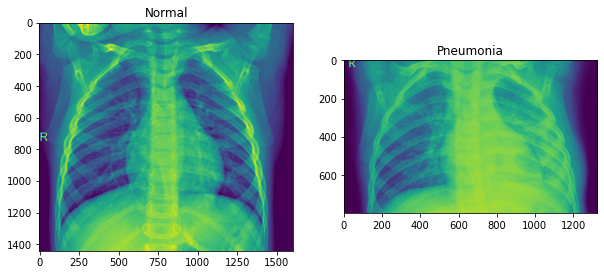

In [ ]:
print(len(os.listdir(train_n)))
rand_norm=np.random.randint(0,len(os.listdir(train_n)))
norm_pic = os.listdir(train_n)[rand_norm]
print('normal picture title: ',norm_pic)
 
norm_pic_address = train_n+norm_pic
 
print(len(os.listdir(train_p)))
rand_p=np.random.randint(0,len(os.listdir(train_p)))
pneu_pic = os.listdir(train_p)[rand_p]
print('pneumonia picture title: ',pneu_pic)
 
pneu_pic_address=train_p+pneu_pic
 
#plotting the images
 
norm_load = Image.open(norm_pic_address)
pneu_load = Image.open(pneu_pic_address)
 
f = plt.figure(figsize= (10,6))
a1 = f.add_subplot(1,2,1)
img_plot = plt.imshow(norm_load)
a1.set_title('Normal')
 
a2 = f.add_subplot(1, 2, 2)
img_plot = plt.imshow(pneu_load)
a2.set_title('Pneumonia')

In [ ]:
#building the cnn
 
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(32,(3,3),strides=(1,1),padding='valid',activation=tf.nn.relu,input_shape=(300,300,1)),
                                  tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2),padding='valid'),
                                  tf.keras.layers.Conv2D(64,(3,3),strides=(1,1),padding='valid',activation=tf.nn.relu),
                                  tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2),padding='valid'),
                                  tf.keras.layers.Conv2D(128,(3,3),strides=(1,1),padding='valid',activation=tf.nn.relu),
                                  tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2),padding='valid'),
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(units=256,activation=tf.nn.relu),
                                  tf.keras.layers.Dropout(0.1),
                                  tf.keras.layers.Dense(units=1,activation=tf.nn.sigmoid)
                                  ])
 
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 298, 298, 32)      320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 71, 71, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 35, 35, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 156800)           

In [ ]:
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.metrics import classification_report, confusion_matrix
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   rotation_range=5,
                                   zoom_range = 0.2,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   )
 
test_datagen = ImageDataGenerator(rescale = 1./255)  #Image normalization.
 
training_set = train_datagen.flow_from_directory(train_folder,
                                                 target_size = (300, 300),
                                                 shuffle=True,
                                                 batch_size = 32,
                                                 class_mode = 'binary',
                                                 color_mode='grayscale')
 
validation_generator = test_datagen.flow_from_directory(val_folder,
    target_size=(300, 300),
    batch_size=32,
    class_mode='binary',
    color_mode='grayscale')
 
test_set = test_datagen.flow_from_directory(test_folder,
                                            target_size = (300, 300),
                                            batch_size = 32,
                                            class_mode = 'binary',
                                            color_mode='grayscale')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
model.fit(training_set,
                         epochs = 1,
                         validation_data = validation_generator,
                         shuffle=False)

163/163 [==============================] - 868s 5s/step - loss: 0.2778 - accuracy: 0.8836 - val_loss: 0.4411 - val_accuracy: 0.6875


In [ ]:
test_accu = model.evaluate(test_set,steps=624)
print("The testing accuracy is : ",test_accu*100,'%')

 20/624 [..............................] - 201s 10s/step - loss: 0.4141 - accuracy: 0.8109
The testing accuracy is :  [0.41405272483825684, 0.8108974099159241, 0.41405272483825684, 0.8108974099159241, 0.41405272483825684, 0.8108974099159241, 0.41405272483825684, 0.8108974099159241, 0.41405272483825684, 0.8108974099159241, 0.41405272483825684, 0.8108974099159241, 0.41405272483825684, 0.8108974099159241, 0.41405272483825684, 0.8108974099159241, 0.41405272483825684, 0.8108974099159241, 0.41405272483825684, 0.8108974099159241, 0.41405272483825684, 0.8108974099159241, 0.41405272483825684, 0.8108974099159241, 0.41405272483825684, 0.8108974099159241, 0.41405272483825684, 0.8108974099159241, 0.41405272483825684, 0.8108974099159241, 0.41405272483825684, 0.8108974099159241, 0.41405272483825684, 0.8108974099159241, 0.41405272483825684, 0.8108974099159241, 0.41405272483825684, 0.8108974099159241, 0.41405272483825684, 0.8108974099159241, 0.41405272483825684, 0.8108974099159241, 0.41405272483825684,